In [1]:
import matplotlib.pyplot as plt, numpy, pandas

# First experiment

In [3]:
df = pandas.read_excel('data/MTT and NaN3.xlsx', sheet_name='First')
df

,Bottle,Time_h,NaN3_mM,OD600_dilute,OD600,MTT_dilute,MTT,A_O
0,1,0,0,1.299,5.196,0.674,2.696,0.518861
1,2,0,5,1.291,5.164,0.879,3.516,0.680868
2,3,0,25,1.238,4.952,0.600,2.400,0.484653
3,4,0,50,1.250,5.000,1.060,4.240,0.848000
4,1,4,0,1.279,5.116,1.369,5.476,1.070367
5,2,4,5,1.265,5.060,0.687,2.748,0.543083
6,3,4,25,1.220,4.880,0.103,0.412,0.084426
7,4,4,50,1.260,5.040,0.558,2.232,0.442857
8,1,24,0,2.500,10.000,1.652,6.608,0.660800
9,2,24,5,2.316,9.264,0.458,1.832,0.197755


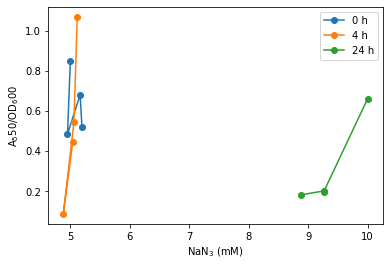

In [5]:
for time in [0, 4, 24]:
    df_t = df.loc[df['Time_h'] == time]
    plt.plot(df_t['OD600'], df_t['A_O'], 'o-', label=str(time) + ' h')
    
plt.legend()
plt.ylabel('A$_550$/OD$_600$')
plt.xlabel('NaN$_3$ (mM)')
plt.show()

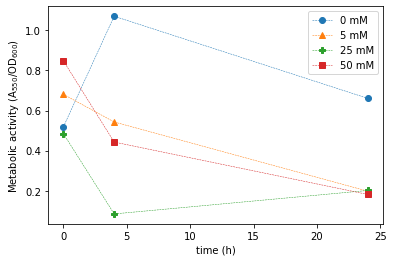

In [5]:
fig = plt.figure()

concs = [0, 5, 25, 50]
markers = ['o', '^', 'P', 's']
concs_markers = dict(zip(concs, markers))

for conc in concs_markers:
    df_t = df.loc[df['NaN3_mM'] == conc]
    plt.plot(df_t['Time_h'], df_t['A_O'], str(concs_markers[conc]) + '--', label=str(conc) + ' mM', linewidth=0.5)

plt.legend()
plt.ylabel('Metabolic activity (A$_{550}$/OD$_{600}$)')
plt.xlabel('time (h)')
plt.draw()
plt.show()

# Second experiment

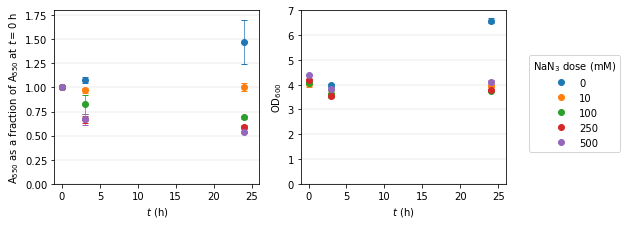

In [6]:
df = pandas.read_excel('data/MTT and NaN3.xlsx', sheet_name='Second')
concs = [0, 10, 100, 250, 500]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
concs_colors = dict(zip(concs, colors))
times = [0, 3, 24]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3), sharex=True)
fig.tight_layout()
axes[0].grid(axis='y', linewidth=0.25)
axes[1].grid(axis='y', linewidth=0.25)

for conc in concs:
    axes[0].errorbar([], [],  # mock plot for legend
                     fmt='o', 
                     label=str(conc), 
                     color=concs_colors[conc])
    
    for time in times:
        
        # A550
        mtt_triplicate_t = df.loc[(df['NaN3_mM']==conc) & (df['Time_h']==time)]['MTTu'].values
        mtt_triplicate_t0 = df.loc[(df['NaN3_mM']==conc) & (df['Time_h']==0)]['MTTu'].values
        mtt_relative_triplicate = mtt_triplicate_t/mtt_triplicate_t0
        yerr = mtt_relative_triplicate.std()/numpy.sqrt(len(mtt_relative_triplicate))
        y = mtt_relative_triplicate.mean()
        x = time
        
        axes[0].errorbar(x, 
                         y, 
                         yerr=yerr,
                         fmt='o',
                         elinewidth=0.7,
                         capsize=3,
                         color=concs_colors[conc])
        
        # OD600
        od_triplicate = df.loc[(df['NaN3_mM']==conc) & (df['Time_h']==time)]['OD600'].values
        yerr = od_triplicate.std()/numpy.sqrt(len(od_triplicate))
        y = od_triplicate.mean()
        x = time
        
        axes[1].errorbar(x, 
                         y, 
                         yerr=yerr,
                         fmt='o',
                         elinewidth=0.7,
                         capsize=3,
                         color=concs_colors[conc])
        
        

fig.legend(title='NaN$_3$ dose (mM)', loc='right', bbox_to_anchor=(1.2, 0.5))

axes[0].set_ylabel('A$_{550}$ as a fraction of A$_{550}$ at $t = 0$ h')
axes[0].set_xlabel('$t$ (h)')
axes[0].set_xlim(-1, 26)
axes[0].set_ylim(0, 1.8)

axes[1].set_ylabel('OD$_{600}$')
axes[1].set_xlabel('$t$ (h)')
axes[1].set_ylim(0, 7)

plt.draw()
plt.show()


In [7]:
fig.savefig('pics/metabolic activity vs NaN3.pdf', bbox_inches='tight')